In [1]:
import pandas as pd

data = pd.read_csv("guesses.txt", sep=" ", header=None)

In [2]:
letters = {
  'a': 0,'b': 0,'c': 0,'d': 0,'e': 0,'f': 0,'g': 0,'h': 0,'i': 0,'j': 0,'k': 0,'l': 0,'m': 0,
  'n': 0,'o': 0,'p': 0,'q': 0,'r': 0,'s': 0,'t': 0,'u': 0,'v': 0,'w': 0,'x': 0,'y': 0,'z': 0,'[': 0,']': 0,'\'': 0,
}

#this funciton will update our dictionary by counting the letters in every word
def letter_count(word):
    for letter in word:
        letters[letter] += 1

#a list containing all of our words
list = data.values.tolist()

for word in list:
    letter_count(str(word))
    
del letters['['] 
del letters[']']
del letters['\'']

In [3]:
#let's see what's actually in letters!
letters

{'a': 5011,
 'b': 1346,
 'c': 1551,
 'd': 2060,
 'e': 5429,
 'f': 885,
 'g': 1333,
 'h': 1371,
 'i': 3088,
 'j': 264,
 'k': 1295,
 'l': 2652,
 'm': 1660,
 'n': 2377,
 'o': 3684,
 'p': 1652,
 'q': 83,
 'r': 3259,
 's': 5996,
 't': 2566,
 'u': 2044,
 'v': 541,
 'w': 844,
 'x': 251,
 'y': 1649,
 'z': 394}

<BarContainer object of 26 artists>

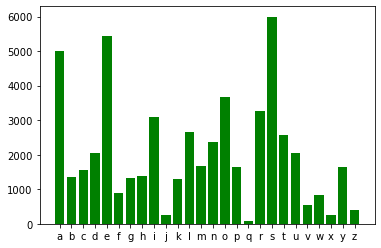

In [5]:
#That wasn't very helpful. Let's try visualizing.
import matplotlib.pyplot as plt

plt.bar(letters.keys(), letters.values(), color='g')

In [7]:
#Finally, letter_count is sorted by the frequency of letters. 
letter_freq = pd.DataFrame(letters.items(), columns=['letter', 'count'])
letter_freq = letter_freq.sort_values(by="count", ascending=False)

letter_freq

,letter,count
18,s,5996
4,e,5429
0,a,5011
14,o,3684
17,r,3259
8,i,3088
11,l,2652
19,t,2566
13,n,2377
3,d,2060


In [8]:
#you may have noticed, letter_count will only count the total number of occurences
#But what if a letter is prone to appear multiple times in one word?

#Let's try this again with letters2 and letter_count2()

letters2 = {
  'a': 0,'b': 0,'c': 0,'d': 0,'e': 0,'f': 0,'g': 0,'h': 0,'i': 0,'j': 0,'k': 0,'l': 0,'m': 0,
  'n': 0,'o': 0,'p': 0,'q': 0,'r': 0,'s': 0,'t': 0,'u': 0,'v': 0,'w': 0,'x': 0,'y': 0,'z': 0,'[': 0,']': 0,'\'': 0,
}

def letter_count2(word):
    count = 1
    for letter in word:
        if(word.find(letter, count) == -1):
            letters2[letter] += 1
        count += 1
        
for word in list:
    letter_count2(str(word))
    
del letters2['['] 
del letters2[']']
del letters2['\'']

<BarContainer object of 26 artists>

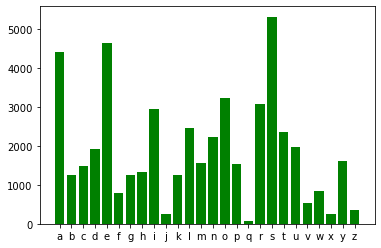

In [9]:
plt.bar(letters2.keys(), letters2.values(), color='g')

In [10]:
#Again, we will sort the letters by frequency
appearances = pd.DataFrame(letters2.items(), columns=['letter', 'words'])
appearances = appearances.sort_values(by="words", ascending=False)

appearances

,letter,words
18,s,5318
4,e,4649
0,a,4421
14,o,3238
17,r,3072
8,i,2942
11,l,2466
19,t,2366
13,n,2237
20,u,1979


Conclusion:

Based on these frequencies, your 'best' first guess would likely be one of the following: SOARE, ROATE, SALET, REAST, or RAISE, as the chance that the solution does not contain any of these letters is exceedingly rare.

If you have no interest in winning or simply enjoy a challenge, feel free try words such as QAJAQ, IMMIX, or JAZZY!